In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def lno_data(data):
      new_data = []
      lines = data.splitlines()
      for line in lines:
            columns = line.split()
            if len(columns)>1:
                  if not line.startswith("#"): 
                        new_data.append(columns)

      new_data = np.array(new_data)

      lno_thresh = []
      for i in range(new_data.shape[0]):
            thresh_vir = new_data[:,0][i].split(sep=',')[1]
            thresh_vir = float(thresh_vir.strip('(),'))
            lno_thresh.append(thresh_vir)

      lno_data = np.array(new_data[:,1:],dtype="float32")

      lno_thresh = np.array(lno_thresh,dtype="float32")
      # lno_thresh[-1] = 1e-10 # last thresh = 0.0
      lno_afqmc_corr = lno_data[:,0]
      lno_afqmc_err = lno_data[:,1]
      lno_afqmc_mp2_corr = lno_data[:,2]
      lno_ccsd_corr = lno_data[:,3]

      lno_mp2_cr = lno_afqmc_mp2_corr-lno_afqmc_corr
      lno_ccsd_mp2_corr = lno_ccsd_corr+lno_mp2_cr
      
      return lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr

In [1]:
from pyscf import gto, scf, tools

aB = 0.529177
a = 2*aB
b = 2*aB
nH = 10
atoms = ""
for i in range(nH):
    atoms += f"H {i*a} 0 0 \n"

mol = gto.M(atom=atoms, basis="ccpvdz", verbose=4)
mf = scf.RHF(mol)
mf.kernel()

System: uname_result(system='Linux', node='yichi-thinkpad', release='4.4.0-26100-Microsoft', version='#1882-Microsoft Fri Jan 01 08:00:00 PST 2016', machine='x86_64')  Threads 12
Python 3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:16:10) [GCC 13.3.0]
numpy 1.24.3  scipy 1.14.1  h5py 3.12.1
Date: Mon Sep  8 12:17:24 2025
PySCF version 2.8.0
PySCF path  /home/yichi/research/software/lno_pyscf
GIT HEAD (branch master) ef75f4190e4de208685670651dc6c467f72b6794

[ENV] PYSCF_EXT_PATH /home/yichi/research/software/pyscf
[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 10
[INPUT] num. electrons = 10
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 H      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.

-5.355374431959623

In [107]:
dm = mf.make_rdm1()               # 1-RDM; tuple (dmα, dmβ) for UHF/UKS
tools.cubegen.density(mol, 'rho.cube', dm, nx=260, ny=120, nz=120)
print("Wrote rho.cube (Gaussian cube format).")

Wrote rho.cube (Gaussian cube format).


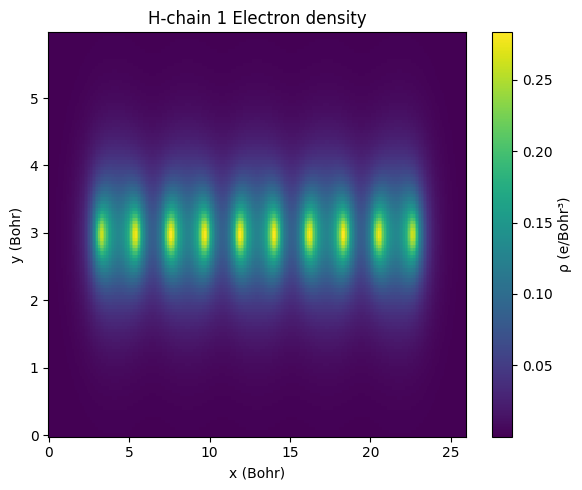

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf.tools import cubegen

# Read the cube back (PySCF writes standard Gaussian cube format)
# (origin, axes, data) = cubegen.Cube(mol).read('rho.cube')  # origin: (3,), axes: (3,3), data: (nx,ny,nz)
cube_data = cubegen.Cube(mol).read('rho.cube') 
# Take a slice (e.g. z-plane through the middle)
k = cube_data.shape[2] // 2    # middle z-index
rho_slice = cube_data[:, :, k].T  # (ny,nx) for imshow

# Pixel coordinates in Å for nice axes (cube axes are in Bohr)
# bohr_to_ang = 0.529177210903
xs = np.arange(cube_data.shape[0])*26/260
ys = np.arange(cube_data.shape[1])*6/120
X, Y = np.meshgrid(xs, ys)

plt.figure(figsize=(6,5))
plt.pcolormesh(X, Y, rho_slice, shading='auto')
plt.xlabel('x (Bohr)'); plt.ylabel('y (Bohr)')
plt.title('H-chain 1 Electron density')
plt.colorbar(label='ρ (e/Bohr³)')
plt.tight_layout(); plt.show()

In [90]:
aB = 0.529177
a = 2*aB
b = 3*aB
nH = 10
atoms = ""
for i in range(nH):
    if i < nH-1:
        atoms += f"H {i*a} 0 0 \n"
    else:
        atoms += f"H {(i-1)*a+b} 0 0 \n"

mol2 = gto.M(atom=atoms, basis="ccpvdz", verbose=4)
mf2 = scf.RHF(mol2)
mf2.kernel()

System: uname_result(system='Linux', node='yichi-thinkpad', release='4.4.0-26100-Microsoft', version='#1882-Microsoft Fri Jan 01 08:00:00 PST 2016', machine='x86_64')  Threads 12
Python 3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:16:10) [GCC 13.3.0]
numpy 1.24.3  scipy 1.14.1  h5py 3.12.1
Date: Thu Aug 21 00:58:26 2025
PySCF version 2.8.0
PySCF path  /home/yichi/research/software/lno_pyscf
GIT HEAD (branch master) ef75f4190e4de208685670651dc6c467f72b6794

[ENV] PYSCF_EXT_PATH /home/yichi/research/software/pyscf
[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 10
[INPUT] num. electrons = 10
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 H      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.

-5.273712852527037

In [109]:
dm2 = mf2.make_rdm1()               # 1-RDM; tuple (dmα, dmβ) for UHF/UKS
tools.cubegen.density(mol2, 'rho2.cube', dm2, nx=270, ny=120, nz=120)
print("Wrote rho.cube (Gaussian cube format).")

Wrote rho.cube (Gaussian cube format).


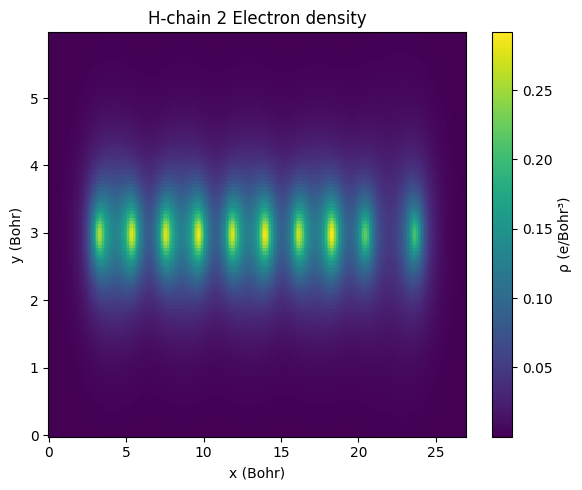

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf.tools import cubegen

# Read the cube back (PySCF writes standard Gaussian cube format)
# (origin, axes, data) = cubegen.Cube(mol).read('rho.cube')  # origin: (3,), axes: (3,3), data: (nx,ny,nz)
cube_data2 = cubegen.Cube(mol).read('rho2.cube') 
# Take a slice (e.g. z-plane through the middle)
k = cube_data2.shape[2] // 2    # middle z-index
rho_slice = cube_data2[:, :, k].T  # (ny,nx) for imshow

# Pixel coordinates in Å for nice axes (cube axes are in Bohr)
# bohr_to_ang = 0.529177210903
xs = np.arange(cube_data2.shape[0])*27/270
ys = np.arange(cube_data2.shape[1])*6/120
X, Y = np.meshgrid(xs, ys)

plt.figure(figsize=(6,5))
plt.pcolormesh(X, Y, rho_slice, shading='auto')
plt.xlabel('x (Bohr)'); plt.ylabel('y (Bohr)')
plt.title('H-chain 2 Electron density')
plt.colorbar(label='ρ (e/Bohr³)')
plt.tight_layout(); plt.show()

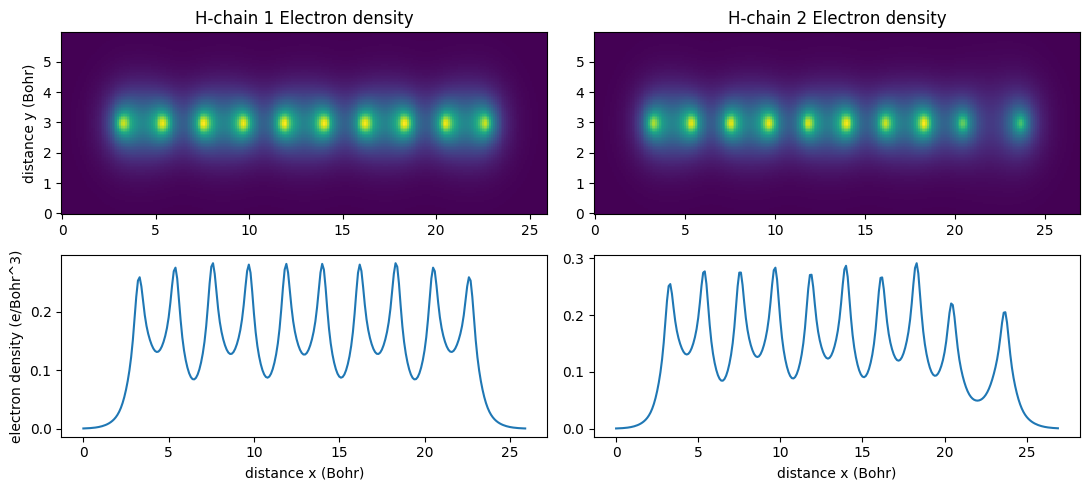

In [133]:
fig, axes = plt.subplots(2, 2, figsize=(11, 5))
cube_data = cubegen.Cube(mol).read('rho.cube') 
# Take a slice (e.g. z-plane through the middle)
k = cube_data.shape[2] // 2    # middle z-index
rho_slice = cube_data[:, :, k].T  # (ny,nx) for imshow

# Pixel coordinates in Å for nice axes (cube axes are in Bohr)
# bohr_to_ang = 0.529177210903
xs = np.arange(cube_data.shape[0])*26/260
ys = np.arange(cube_data.shape[1])*6/120
X, Y = np.meshgrid(xs, ys)

# axes[0].figure(figsize=(6,5))
axes[0,0].pcolormesh(X, Y, rho_slice, shading='auto')
# axes[0,0].set_xlabel('distance  (Bohr)')
axes[0,0].set_ylabel('distance y (Bohr)')
axes[0,0].set_title('H-chain 1 Electron density')
# axes[0].colorbar(label='ρ (e/Bohr³)')


k = cube_data2.shape[2] // 2    # middle z-index
rho_slice = cube_data2[:, :, k].T  # (ny,nx) for imshow

# Pixel coordinates in Å for nice axes (cube axes are in Bohr)
# bohr_to_ang = 0.529177210903
xs = np.arange(cube_data2.shape[0])*27/270
ys = np.arange(cube_data2.shape[1])*6/120
X, Y = np.meshgrid(xs, ys)

# axes[1].figure(figsize=(6,5))
axes[0,1].pcolormesh(X, Y, rho_slice, shading='auto')
# axes[0,1].set_xlabel('x (Bohr)'); plt.ylabel('y (Bohr)')
axes[0,1].set_title('H-chain 2 Electron density')

rho1_x = cube_data[:, k, k].T
rho2_x = cube_data2[:, k, k].T 

xs1 = np.arange(cube_data.shape[0])*26/260
axes[1,0].plot(xs1,rho1_x)
axes[1,0].set_xlabel("distance x (Bohr)")
axes[1,0].set_ylabel("electron density (e/Bohr^3)")

xs2 = np.arange(cube_data2.shape[0])*27/270
axes[1,1].plot(xs2,rho2_x)
axes[1,1].set_xlabel("distance x (Bohr)")
# axes[1,1].set_ylabel("electron density (e/Bohr^3)")

plt.tight_layout(); plt.show()

In [115]:
rho1_x = cube_data[:, k, k].T
rho2_x = cube_data2[:, k, k].T 

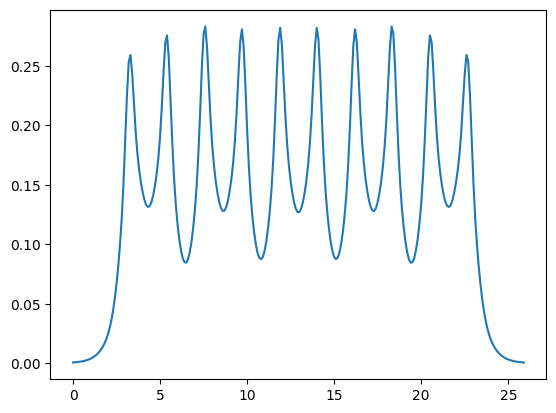

In [121]:
xs1 = np.arange(cube_data.shape[0])*26/260
plt.plot(xs1,rho1_x)
plt.show()

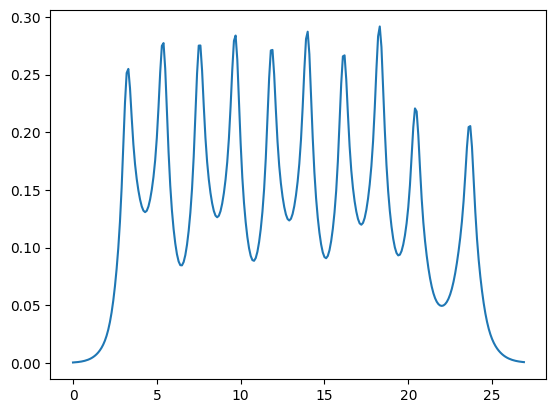

In [122]:
xs2 = np.arange(cube_data2.shape[0])*27/270
plt.plot(xs2,rho2_x)
plt.show()

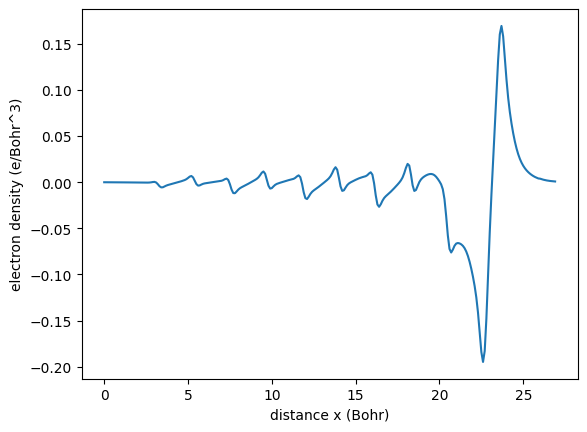

In [131]:
rho1_x_new = np.hstack((rho1_x,np.zeros(10)))
xs2 = np.arange(cube_data2.shape[0])*27/270
plt.plot(xs2,rho2_x-rho1_x_new)
plt.xlabel("distance x (Bohr)")
plt.ylabel("electron density (e/Bohr^3)")
plt.show()

In [ ]:
'''
# thresh(occ,vir)        afqmc_corr        err          mp2_afqmc_corr   ccsd_corr         hf_cr           err           ccsd_cr0          err            ccsd_cr1         err           ccsd_cr2          err             ccsd_cr         err         ave_olp_ratio       err         ave_norb  max_norb ave_nelec  max_nelec  run_time
  (0.001, 0.0001)        -0.341414       0.000042        -0.354394       -0.342242       -0.308257       0.000649        1.799592        0.004440        -3.180092       0.008005        1.347346        0.004120        -0.033156       0.000640        0.916579        0.000467        5.20    6       6.80    8       912.51
  (0.0005, 5e-05)        -0.353084       0.000048        -0.360564       -0.353568       -0.313116       0.000650        2.104476        0.005143        -3.792005       0.009402        1.647562        0.004822        -0.039968       0.000637        0.904143        0.000511        5.60    6       8.00    9       1039.45
  (0.0003, 3e-05)        -0.353385       0.000047        -0.360687       -0.353652       -0.314190       0.000648        2.114741        0.005111        -3.816498       0.009362        1.662563        0.004811        -0.039195       0.000636        0.903763        0.000514        5.60    6       8.40    10      1086.57
  (0.0001, 1e-05)        -0.362217       0.000077        -0.364315       -0.361442       -0.303866       0.000624        3.726311        0.008884        -6.996219       0.016796        3.211558        0.008400        -0.058352       0.000582        0.856054        0.000629        8.40    10      11.00   13      1707.40
  (1e-05, 1e-06)         -0.367331       0.000148        -0.367583       -0.364368       -0.280057       0.000578        6.729985        0.015969        -12.956470      0.030815        6.139208        0.015220        -0.087277       0.000479        0.783049        0.000740        13.20           16      15.80   18      3450.20
  (1e-06, 1e-07)         -0.368913       0.000220        -0.368923       -0.364236       -0.258863       0.000557        9.841116        0.024169        -19.105274      0.046975        9.154106        0.023109        -0.110051       0.000402        0.723528        0.000777        18.00           20      19.00   20      5597.28
'''

In [3]:
# h30-h100
data='''
#  thresh(occ,vir)       afqmc_corr         err        mp2_afqmc_corr    ccsd_corr         hf_cr           err            ccsd_cr           err        ave_norb     max_norb  ave_nelec   max_nelec  run_time
 (1.00e-05,1.00e-06)     -0.545916       0.000192        -0.546493       -0.542389       -0.406177       0.000670        -0.139735       0.000544        18.53           23      14.80   18      3913.17
 (1.00e-05,1.00e-06)     -0.725509       0.000228        -0.726438       -0.720282       -0.535978       0.000755        -0.189532       0.000606        20.70           24      15.60   18      7068.61
 (1.00e-05,1.00e-06)     -0.904485       0.000262        -0.905779       -0.898139       -0.662614       0.000824        -0.241869       0.000649        21.84           26      16.08   18      10324.63
 (1.00e-05,1.00e-06)     -1.083430       0.000291        -1.085090       -1.075986       -0.790299       0.000898        -0.293131       0.000706        22.53           26      16.40   18      13485.23
 (1.00e-05,1.00e-06)     -1.262823       0.000318        -1.264854       -1.253832       -0.918521       0.000960        -0.344304       0.000748        23.03           26      16.63   18      16611.37
 (1.00e-05,1.00e-06)     -1.441317       0.000340        -1.443718       -1.431678       -1.046308       0.001024        -0.395011       0.000795        23.40           26      16.80   18      19740.62
 (1.00e-05,1.00e-06)     -1.620281       0.000363        -1.623049       -1.609516       -1.171796       0.001072        -0.448486       0.000823        23.69           26      16.93   18      22844.59
 (1.00e-05,1.00e-06)     -1.798806       0.000384        -1.801944       -1.787364       -1.298416       0.001120        -0.500394       0.000860        23.92           26      17.04   18      25712.58
 '''

lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
      = lno_data(data)

print(f'lno-threshold: \n',
      f'{lno_thresh}')
print(f'lno-ccsd correlation energy: \n', 
      f'{lno_ccsd_corr}')
print(f'lno-ccsd-mp2 correlation energy: \n',
      f'{lno_ccsd_mp2_corr}')
# print(f'ccsd correlation energy: \n', 
#       f'{ccsd_corr:.6f}')
print(f'lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_corr}')
print(f'lno-afqmc/ccsd energy uncertainty (1 sigma): \n', 
      f'{lno_afqmc_err}')
print(f'mp2 corrected lno-afqmc/ccsd correlation energy: \n', 
      f'{lno_afqmc_mp2_corr}')
# print(f'correlation space size \n nelec_avg {nele_avg} \n nelec_max {nele_max}'
#       f'\n norb_avg {norb_avg} \n norb_max {norb_max}')
# print(f'runtime {runtime}')
# print(f'afqmc/ccsd correlation energy: \n', 
#       f'{afqmc_corr:.6f} +/- {afqmc_err:6f}')

lno-threshold: 
 [1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06 1.e-06]
lno-ccsd correlation energy: 
 [-0.542389 -0.720282 -0.898139 -1.075986 -1.253832 -1.431678 -1.609516
 -1.787364]
lno-ccsd-mp2 correlation energy: 
 [-0.54296595 -0.721211   -0.899433   -1.077646   -1.255863   -1.434079
 -1.6122841  -1.7905021 ]
lno-afqmc/ccsd correlation energy: 
 [-0.545916 -0.725509 -0.904485 -1.08343  -1.262823 -1.441317 -1.620281
 -1.798806]
lno-afqmc/ccsd energy uncertainty (1 sigma): 
 [0.000192 0.000228 0.000262 0.000291 0.000318 0.00034  0.000363 0.000384]
mp2 corrected lno-afqmc/ccsd correlation energy: 
 [-0.546493 -0.726438 -0.905779 -1.08509  -1.264854 -1.443718 -1.623049
 -1.801944]


In [4]:
nH = np.array([30,40,50,60,70,80,90,100])
e_mf = np.array([-15.6058714125,-20.8060018538,-26.0061436496,-31.2062871202,-36.4064307627,-41.6065743711,-46.8067179408,-52.0068614887])

In [8]:
e_lno_afqmc = e_mf+lno_afqmc_corr
e_lno_afqmc_mp2 = e_mf+lno_afqmc_mp2_corr
e_lno_afqmc_ph = e_lno_afqmc/nH
e_lno_afqmc_mp2_ph = e_lno_afqmc_mp2/nH
lno_afqmc_err_ph = lno_afqmc_err/np.sqrt(nH)

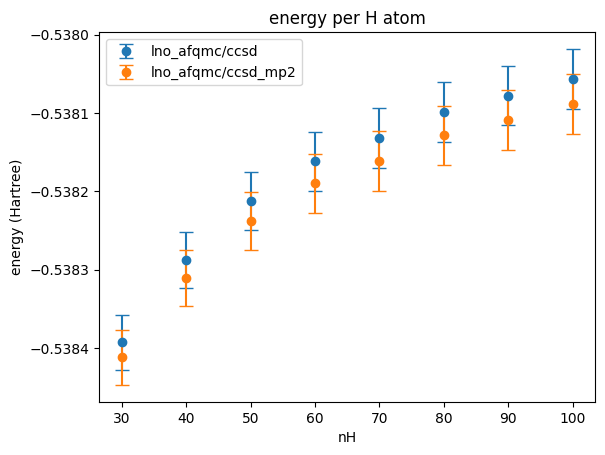

In [9]:
plt.errorbar(
    nH,e_lno_afqmc_ph,yerr=lno_afqmc_err_ph,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    nH,e_lno_afqmc_mp2_ph,yerr=lno_afqmc_err_ph,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.xlabel('nH')
plt.ylabel('energy (Hartree)')
plt.title('energy per H atom')
plt.legend()
plt.show()

In [27]:
import numpy as np
from scipy.optimize import curve_fit

def linear_model(x, k, a):
    return k * x + a

popt, pcov = curve_fit(
    linear_model, 1/nH, e_lno_afqmc_ph, sigma=lno_afqmc_err_ph, absolute_sigma=True)
k_lno, a_lno = popt
k_lno_err, a_lno_err = np.sqrt(np.diag(pcov))

print(f"k = {k_lno} ± {k_lno_err}")
print(f"a = {a_lno} ± {a_lno_err}")

popt, pcov = curve_fit(
    linear_model, 1/nH, e_lno_afqmc_mp2_ph, sigma=lno_afqmc_err_ph, absolute_sigma=True)
k_lno_mp2, a_lno_mp2 = popt
k_lno_mp2_err, a_lno_mp2_err = np.sqrt(np.diag(pcov))

print("mp2 corrected")
print(f"k = {k_lno_mp2} ± {k_lno_mp2_err}")
print(f"a = {a_lno_mp2} ± {a_lno_mp2_err}")

k = -0.014389307973040652 ± 0.0017177335212043587
a = -0.537920539478654 ± 3.412006302260621e-05
mp2 corrected
k = -0.013865796478980919 ± 0.0017177546006664074
a = -0.537957036209643 ± 3.412031904913344e-05


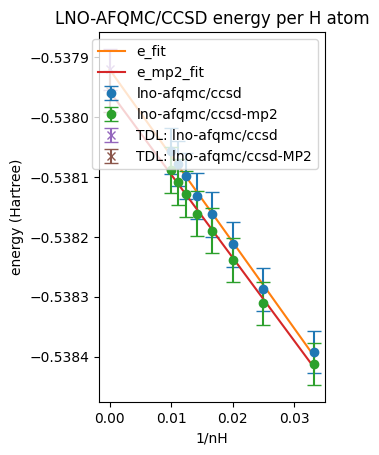

In [ ]:
x = np.linspace(0,max(1/nH),100)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt.errorbar(
    1/nH,e_lno_afqmc_ph,yerr=lno_afqmc_err_ph,fmt='o',capsize=5,label='lno-afqmc/ccsd')
e_fit = k_lno*x+a_lno
plt.plot(x,e_fit,label="e_fit")
plt.errorbar(
    1/nH,e_lno_afqmc_mp2_ph,yerr=lno_afqmc_err_ph,fmt='o',capsize=5,label='lno-afqmc/ccsd-mp2')
e_mp2_fit = k_lno_mp2*x+a_lno_mp2
plt.plot(x,e_mp2_fit,label="e_mp2_fit")
plt.errorbar(0,a_lno,yerr=a_lno_err,fmt='x',capsize=5,label='TDL: lno-afqmc/ccsd')
plt.errorbar(0,a_lno_mp2,yerr=a_lno_err,fmt='x',capsize=5,label='TDL: lno-afqmc/ccsd-MP2')
plt.xlabel('1/nH')
plt.ylabel('energy (Hartree)')
plt.title('LNO-AFQMC/CCSD energy per H atom')
plt.legend()
plt.show()

In [31]:
e_afqmc = np.array([-16.1575,-21.5377,-26.9178,-32.2976,-37.6778,-43.0553,-48.4330,-53.8113])
err_afqmc = np.array([0.0002,0.0003,0.0004,0.0005,0.0005,0.0005,0.0007,0.0006])
e_afqmc_ph = e_afqmc/nH
err_afqmc_ph = err_afqmc/np.sqrt(nH)

In [32]:
def linear_model(x, k, a):
    return k * x + a

popt, pcov = curve_fit(
    linear_model, 1/nH, e_afqmc_ph, sigma=err_afqmc_ph, absolute_sigma=True)
k, a = popt
k_err, a_err = np.sqrt(np.diag(pcov))

print(f"k = {k} ± {k_err}")
print(f"a = {a} ± {a_err}")

k = -0.019161495522131318 ± 0.00216514943552522
a = -0.537954480955419 ± 4.9373097439420725e-05


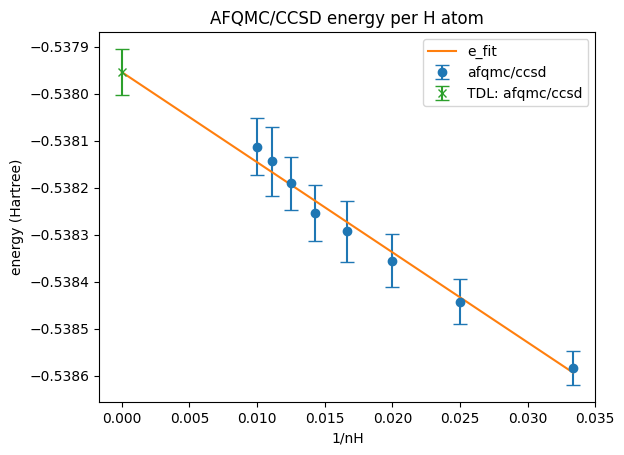

In [33]:
x = np.linspace(0,max(1/nH),100)
plt.errorbar(1/nH,e_afqmc_ph,yerr=err_afqmc_ph,fmt='o',capsize=5,label='afqmc/ccsd')
e_fit = k*x+a
plt.plot(x,e_fit,label="e_fit")
plt.errorbar(0,a,yerr=a_err,fmt='x',capsize=5,label='TDL: afqmc/ccsd')
plt.xlabel('1/nH')
plt.ylabel('energy (Hartree)')
plt.title('AFQMC/CCSD energy per H atom')
plt.legend()
plt.show()

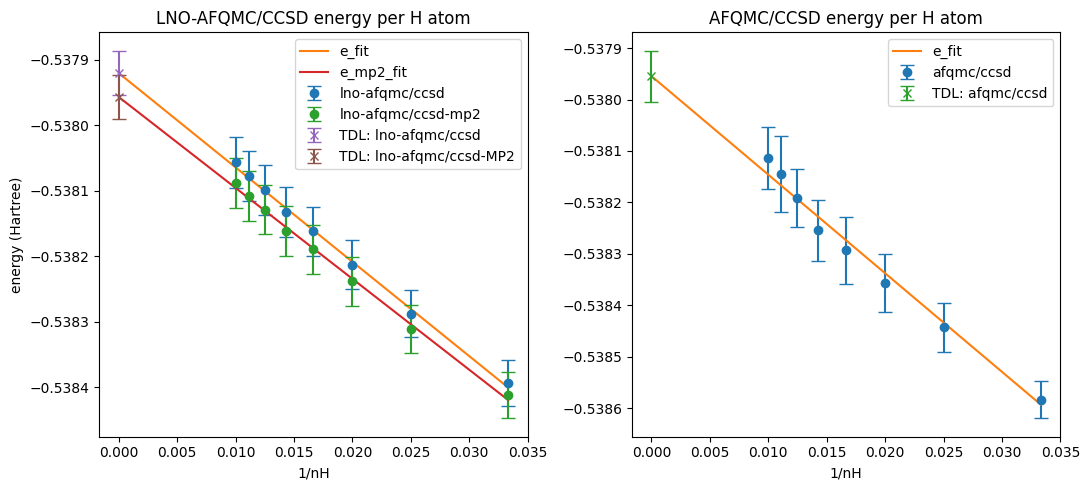

In [43]:
x = np.linspace(0,max(1/nH),100)
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
axes[0].errorbar(
    1/nH,e_lno_afqmc_ph,yerr=lno_afqmc_err_ph,fmt='o',capsize=5,label='lno-afqmc/ccsd')
e_fit = k_lno*x+a_lno
axes[0].plot(x,e_fit,label="e_fit")
axes[0].errorbar(
    1/nH,e_lno_afqmc_mp2_ph,yerr=lno_afqmc_err_ph,fmt='o',capsize=5,label='lno-afqmc/ccsd-mp2')
e_mp2_fit = k_lno_mp2*x+a_lno_mp2
axes[0].plot(x,e_mp2_fit,label="e_mp2_fit")
axes[0].errorbar(0,a_lno,yerr=a_lno_err,fmt='x',capsize=5,label='TDL: lno-afqmc/ccsd')
axes[0].errorbar(0,a_lno_mp2,yerr=a_lno_err,fmt='x',capsize=5,label='TDL: lno-afqmc/ccsd-MP2')
axes[0].set_xlabel('1/nH')
axes[0].set_ylabel('energy (Hartree)')
axes[0].set_title('LNO-AFQMC/CCSD energy per H atom')
axes[0].legend()

axes[1].errorbar(1/nH,e_afqmc_ph,yerr=err_afqmc_ph,fmt='o',capsize=5,label='afqmc/ccsd')
e_fit = k*x+a
axes[1].plot(x,e_fit,label="e_fit")
axes[1].errorbar(0,a,yerr=a_err,fmt='x',capsize=5,label='TDL: afqmc/ccsd')
axes[1].set_xlabel('1/nH')
# axes[1].ylabel('energy (Hartree)')
axes[1].set_title('AFQMC/CCSD energy per H atom')
axes[1].legend()

plt.tight_layout()  # avoid overlap
plt.show()

In [11]:
nH = np.array([40,80,120,160])
e_mf = np.array([-21.0019645737,-41.9835706087,-62.9651754416,-83.9467794283])
lno_afqmc_corr = np.array([-0.626789,-1.246493,-1.866018,-2.486901])
lno_afqmc_mp2_corr = np.array([-0.627858,-1.249357,-1.870693,-2.493381])
err_lno_afqmc = np.array([0.000159,0.000232,0.000285,0.000337])
e_lno_afqmc = e_mf+lno_afqmc_corr
e_lno_afqmc_mp2 = e_mf+lno_afqmc_mp2_corr
e_lno_afqmc_ph = e_lno_afqmc/nH
e_lno_afqmc_mp2_ph = e_lno_afqmc_mp2/nH
err_lno_afqmc_ph = err_lno_afqmc/np.sqrt(nH)

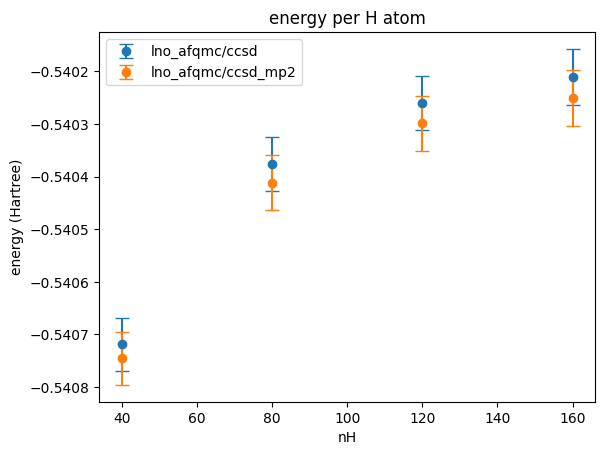

In [13]:
plt.errorbar(nH,e_lno_afqmc_ph,yerr=err_lno_afqmc_ph*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(nH,e_lno_afqmc_mp2_ph,yerr=err_lno_afqmc_ph*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.xlabel('nH')
plt.ylabel('energy (Hartree)')
plt.title('energy per H atom')
plt.legend()
plt.show()

extrapolate energy at TDL per H: -0.5400
extrapolate mp2 corrected energy at TDL per H: -0.5401


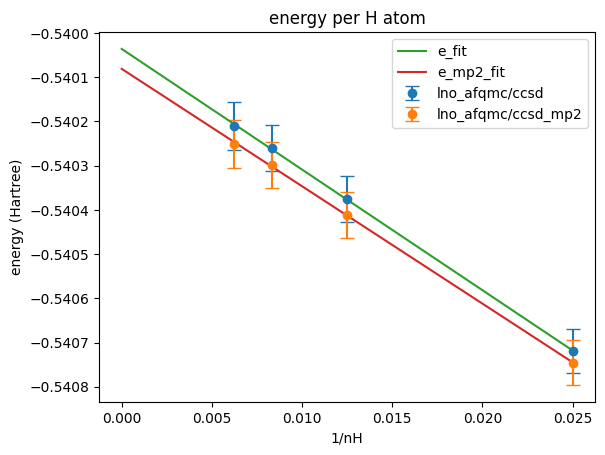

In [16]:
plt.errorbar(1/nH,e_lno_afqmc_ph,yerr=err_lno_afqmc_ph*2,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(1/nH,e_lno_afqmc_mp2_ph,yerr=err_lno_afqmc_ph*2,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
x = np.linspace(0,max(1/nH),100)
k, a = np.polyfit(1/nH, e_lno_afqmc_ph, 1)
e_fit = k*x+a
plt.plot(x,e_fit,label="e_fit")
print(f"extrapolate energy at TDL per H: {a:.4f}")
k_mp2, a_mp2 = np.polyfit(1/nH, e_lno_afqmc_mp2_ph, 1)
e_mp2_fit = k_mp2*x+a_mp2
plt.plot(x,e_mp2_fit,label="e_mp2_fit")
print(f"extrapolate mp2 corrected energy at TDL per H: {a_mp2:.4f}")
plt.xlabel('1/nH')
plt.ylabel('energy (Hartree)')
plt.title('energy per H atom')
plt.legend()
plt.show()

In [18]:
energy = np.vstack((nH,e_lno_afqmc,e_lno_afqmc_mp2,err_lno_afqmc)).T
with open(f'tdl.out', 'a') as outfile:
    print("nH  lno-afqmc/ccsd  lno-afqmc/ccsd-mp2  err  afqmc/ccsd err",file=outfile)
    for i,n in enumerate(nH):
        print(f" {energy[i][0]:.1f} \t {energy[i][1]:.6f} \t {energy[i][2]:.6f} \t {energy[i][3]:.2e}",file=outfile)

In [7]:
# H80 a = 0.96892 # 1.831aB
# AFQMC energy: -43.2513 +/- 0.0008
# converged SCF energy = -41.9835706086777
# E(RCCSD) = -43.2187515626576
# ccsd(t) energy: -43.25881794557464
afqmc_corr = -43.2513 - -41.9835706086777
afqmc_err = 0.0008
ccsd_corr = -43.2187515626576- -41.9835706086777
ccsd_t_corr = -43.25881794557464 - -41.9835706086777
print(afqmc_corr)
print(ccsd_corr)
print(ccsd_t_corr)

-1.2677293913222982
-1.2351809539798992
-1.275247336896939


In [8]:
data = '''
# thresh(occ,vir)       afqmc_corr         err         mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -1.147700       0.000090        -1.215492       -1.147008       -1.056818       0.000981        -0.090882       0.000973        7.65    8       5.60    6       2598.40
# (5.00e-04,5.00e-05)     -1.180769       0.000092        -1.229405       -1.178832       -1.078576       0.000984        -0.102197       0.000955        9.40    10      5.90    6       2775.73
 (3.00e-04,3.00e-05)     -1.181338       0.000088        -1.229580       -1.179058       -1.078264       0.001003        -0.103077       0.000943        9.60    10      5.90    6       2795.16
 (1.00e-04,1.00e-05)     -1.225936       0.000123        -1.240748       -1.220478       -1.055764       0.000969        -0.170178       0.000873        14.25           16      9.60    10      3418.16
 (1.00e-05,1.00e-06)     -1.247485       0.000284        -1.250355       -1.236536       -0.964946       0.000876        -0.282533       0.000726        23.35           26      16.70   18      5108.92
 (1.00e-06,1.00e-07)     -1.248875       0.000441        -1.249205       -1.236942       -0.834131       0.000785        -0.414743       0.000521        36.05           44      28.40   34      10292.92
 (1.00e-07,1.00e-08)     -1.248205       0.000680        -1.248237       -1.235742       -0.729156       0.000674        -0.519054       0.000516        48.60           60      41.30   50      23880.65
 (1.00e-08,1.00e-09)     -1.249424       0.000902        -1.249426       -1.235324       -0.650848       0.000678        -0.598569       0.000509        59.75           74      53.70   68      42553.40
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)

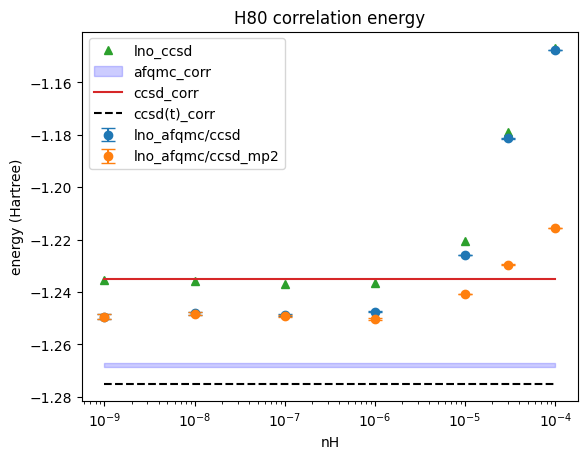

In [11]:
plt.errorbar(
    lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(
    lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'-',label='ccsd_corr')
plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H80 correlation energy')
plt.legend()
plt.show()

In [2]:
# H80 a = 1.831aB d = 3aB
# AFQMC energy: -44.4389 +/- 0.0010
# E(RCCSD) = -44.4457980741162  E_corr = -1.299492067487886
# RCCSD(T) correction = -0.00222087513402915
# ccsd(t) energy: -44.44801894925023
# converged SCF energy = -43.1463060066283
e_mf = -43.1463060066283
afqmc_corr = -44.4389 - e_mf
afqmc_err = 0.001
ccsd_corr = -1.299492067487886
ccsd_t_corr = -44.44801894925023 - e_mf
print(afqmc_corr)
print(ccsd_t_corr)
print(ccsd_t_corr-afqmc_corr)

-1.2925939933716961
-1.3017129426219327
-0.009118949250236597


In [5]:
data = '''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -1.260335       0.000000        -1.302612       -1.260334       -1.207070       0.001803        -0.053263       0.001803        3.95    4       2.00    2       1777.40
# (3.00e-04,3.00e-05)     -1.260334       0.000000        -1.302611       -1.260334       -1.206916       0.001801        -0.053419       0.001801        3.95    4       2.00    2       1769.03
 (1.00e-04,1.00e-05)     -1.296403       0.000127        -1.299158       -1.297638       -1.193852       0.001698        -0.102546       0.001621        5.90    6       5.90    6       2332.46
 (1.00e-05,1.00e-06)     -1.300023       0.000131        -1.301738       -1.298538       -1.195586       0.001610        -0.104435       0.001530        7.80    8       5.90    6       2418.43
 (1.00e-06,1.00e-07)     -1.301093       0.000222        -1.301227       -1.299479       -1.143836       0.001630        -0.157255       0.001444        11.55           12      9.70    10      2950.45
 (1.00e-07,1.00e-08)     -1.301417       0.000285        -1.301438       -1.299501       -1.100003       0.001544        -0.201418       0.001325        16.85           18      13.40   14      3544.59
 (1.00e-08,1.00e-09)     -1.301634       0.000377        -1.301630       -1.299498       -1.032604       0.001503        -0.269035       0.001217        23.75           26      20.50   22      5116.04
 (1.00e-09,1.00e-10)     -1.302688       0.000536        -1.302684       -1.299497       -0.976319       0.001514        -0.326365       0.001021        31.65           36      27.20   30      8161.56
 (1.00e-10,1.00e-11)     -1.301153       0.000678        -1.301149       -1.299492       -0.884199       0.001270        -0.416951       0.000739        43.10           52      39.10   46      15274.21
 (1.00e-11,1.00e-12)     -1.299173       0.000774        -1.299169       -1.299490       -0.797082       0.001170        -0.502088       0.000585        56.75           69      51.70   64      31816.72
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)

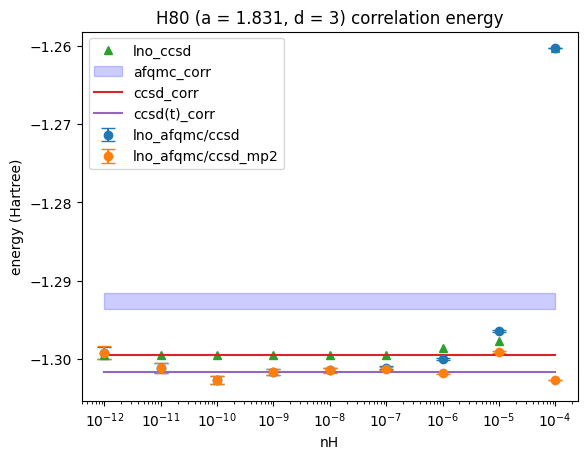

In [6]:
plt.errorbar(
    lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(
    lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'-',label='ccsd_corr')
plt.plot(x,[ccsd_t_corr]*100,'-',label='ccsd(t)_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H80 (a = 1.831, d = 3) correlation energy')
plt.legend()
plt.show()

In [ ]:
# H30 a=d=1.831
# converged SCF energy = -15.7565823173806
# E(RCCSD) = -16.22295654569875  E_corr = -0.4663742283181489
# RCCSD(T) correction = -0.0121409773978195
# ccsd(t) energy: -16.235097523096567
# AFQMC energy: -16.2346 +/- 0.0004
# 1 site DMRG_E = -16.2195040738 | DE = -1.89e-07 d=2000
# 2 site DMRG_E = -16.2217181643 | DE = -1.78e-07 | DW = 7.51904e-04
ccsd_corr = -0.4663742283181489
ccsd_t_corr = -16.235097523096567 - -15.7565823173806
dmrg_corr = -16.2195040738 - -15.7565823173806
afqmc_corr = -16.2346 - -15.7565823173806
afqmc_err = 0.0004
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.419894       0.000054        -0.449926       -0.419445       -0.391397       0.000566        -0.028495       0.000546        7.07    8       4.93    6       920.84
 (3.00e-04,3.00e-05)     -0.450317       0.000058        -0.464229       -0.449508       -0.410198       0.000557        -0.040117       0.000562        8.93    10      5.73    6       994.08
 (1.00e-04,1.00e-05)     -0.464367       0.000069        -0.468504       -0.462183       -0.403669       0.000683        -0.060698       0.000618        12.00   14      8.93    10      1159.15
 (1.00e-05,1.00e-06)     -0.471842       0.000129        -0.472497       -0.466976       -0.374787       0.000583        -0.097055       0.000532        18.67   24      14.53   18      1503.28
 (1.00e-06,1.00e-07)     -0.474013       0.000207        -0.474066       -0.466843       -0.342254       0.000501        -0.131759       0.000392        24.80   28      21.73   26      2032.95
 (1.00e-07,1.00e-08)     -0.476777       0.000310        -0.476777       -0.466466       -0.321015       0.000451        -0.155761       0.000284        28.67   30      27.33   30      2514.62
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)

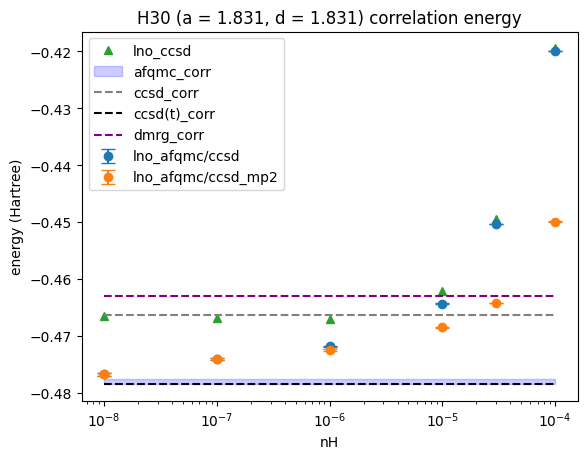

In [3]:
plt.errorbar(
    lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(
    lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[dmrg_corr]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H30 (a = 1.831, d = 1.831) correlation energy')
plt.legend()
plt.show()

In [5]:
# H40 a=d=1.831
# converged SCF energy = -21.0019645737223
# E(RCCSD) = -21.62210834629252  E_corr = -0.6201437725701879
# RCCSD(T) correction = -0.0176994487844547
# ccsd(t) energy: -21.639807795076976
# AFQMC energy: -21.6382 +/- 0.0004
e_mf = -21.0019645737223
ccsd_corr = -0.6201437725701879
ccsd_t_corr = -21.639807795076976 - e_mf
afqmc_corr = -21.6382 - e_mf
afqmc_err = 0.0004
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.565535       0.000062        -0.603066       -0.565026       -0.524762       0.000699        -0.040773       0.000690        7.30    8       5.20    6       1268.71
 (3.00e-04,3.00e-05)     -0.596444       0.000056        -0.617165       -0.595470       -0.542530       0.000806        -0.053917       0.000792        9.20    10      5.80    6       1359.84
 (1.00e-04,1.00e-05)     -0.616414       0.000088        -0.622697       -0.613862       -0.533335       0.000673        -0.083080       0.000627        12.60   14      9.20    10      1605.46
 (1.00e-05,1.00e-06)     -0.627269       0.000167        -0.628342       -0.620928       -0.493990       0.000718        -0.133283       0.000588        20.70   25      15.40   18      2238.13
 (1.00e-06,1.00e-07)     -0.629197       0.000279        -0.629316       -0.620918       -0.443499       0.000631        -0.185700       0.000448        28.80   35      23.80   30      3431.70
 (1.00e-07,1.00e-08)     -0.630967       0.000400        -0.630976       -0.620352       -0.402995       0.000529        -0.227973       0.000302        35.30   40      32.20   40      4984.68
 (1.00e-08,1.00e-09)     -0.633722       0.000437        -0.633721       -0.620182       -0.380309       0.000525        -0.253411       0.000382        38.80   40      37.60   40      5997.28
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)

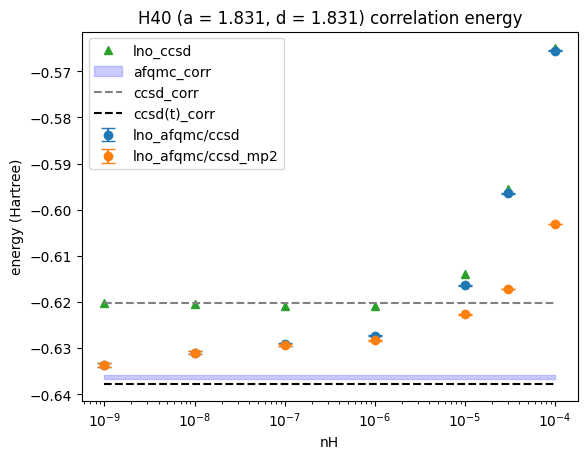

In [6]:
plt.errorbar(
    lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(
    lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H40 (a = 1.831, d = 1.831) correlation energy')
plt.legend()
plt.show()

In [6]:
# H40 a=1.831 d=3
# converged SCF energy = -21.5756025423033
# E(RCCSD) = -22.22585047306383  E_corr = -0.6502479307605629
# RCCSD(T) correction = -0.0010780749331425
# ccsd(t) energy: -22.226928547996973
# AFQMC energy: -22.2245 +/- 0.0004
e_mf = -21.5756025423033
ccsd_corr = -0.6502479307605629
ccsd_t_corr = -22.226928547996973 - e_mf
afqmc_corr = -22.2245 - e_mf
afqmc_err = 0.0004
print(ccsd_t_corr)
print(afqmc_corr)
data='''
# thresh(occ,vir)   afqmc_corr   err   mp2_afqmc_corr   ccsd_corr   hf_cr    err   ccsd_cr   err   ave_olp_ratio   err   ave_norb   max_norb   ave_nelec   max_nelec  run_time
 (1.00e-03,1.00e-04)     -0.631204       0.000000        -0.651733       -0.631204       -0.605974       0.001408        -0.025232       0.001408        3.90    4       2.00    2       887.87
 (1.00e-04,1.00e-05)     -0.648868       0.000090        -0.650168       -0.649378       -0.598095       0.001344        -0.050773       0.001268        5.80    6       5.80    6       1160.18
 (1.00e-05,1.00e-06)     -0.650514       0.000099        -0.651319       -0.649799       -0.597384       0.001191        -0.053133       0.001102        7.60    8       5.80    6       1198.37
 (1.00e-06,1.00e-07)     -0.651005       0.000147        -0.651062       -0.650241       -0.572587       0.001023        -0.078415       0.000900        11.10           12      9.40    10      1451.22
 (1.00e-07,1.00e-08)     -0.651501       0.000223        -0.651507       -0.650254       -0.554196       0.001164        -0.097302       0.000997        15.70           18      12.80   14      1695.57
 (1.00e-08,1.00e-09)     -0.651086       0.000223        -0.651087       -0.650254       -0.522256       0.000955        -0.128833       0.000808        21.50           26      19.00   22      2322.37
 (1.00e-09,1.00e-10)     -0.650714       0.000303        -0.650715       -0.650254       -0.495723       0.001050        -0.154987       0.000777        27.30           33      24.40   30      3174.54
 (1.00e-10,1.00e-11)     -0.650418       0.000436        -0.650419       -0.650251       -0.460174       0.000970        -0.190243       0.000618        34.30           39      32.20   38      4712.35
 (0.00e+00,0.00e+00)     -0.648886       0.000530        -0.648887       -0.650251       -0.416728       0.000947        -0.232163       0.000448        40.00           40      40.00   40      6235.24
'''
lno_thresh,lno_afqmc_corr,lno_afqmc_mp2_corr,lno_afqmc_err,lno_ccsd_corr,lno_ccsd_mp2_corr \
    = lno_data(data)
lno_thresh[-1] = 1e-15

-0.6513260056936723
-0.6488974576966982


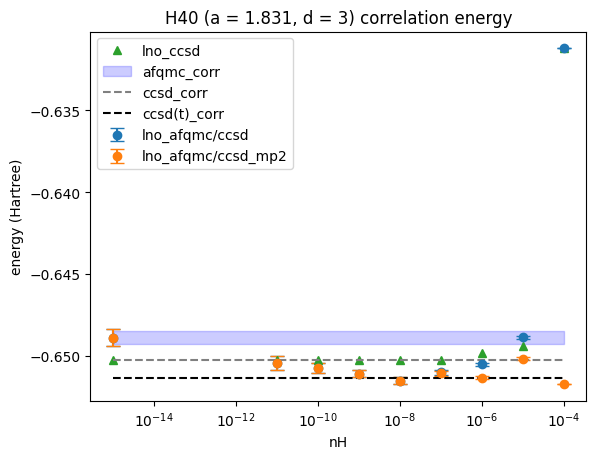

In [7]:
plt.errorbar(
    lno_thresh,lno_afqmc_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd')
plt.errorbar(
    lno_thresh,lno_afqmc_mp2_corr,yerr=lno_afqmc_err,fmt='o',capsize=5,label='lno_afqmc/ccsd_mp2')
plt.plot(
    lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_corr+afqmc_err,afqmc_corr-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H40 (a = 1.831, d = 3) correlation energy')
plt.legend()
plt.show()